#                                 1.Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#             2. Read the data as a data frame

In [2]:
df = pd.read_csv('insurance (2).csv')

#  3. EDA

###  3.1 : The data is of 1338 rows and  7 columns (x,y) with rows carrying data and columns being the features.

In [3]:
df.shape

(1338, 7)

###  3.2 : .info is a method to display Data type
### Other things that can be done
 #### - all columns and their datatypes
 #### - number of non-null data
 #### - Total number of data (In this case range index states 1338 entries and it is the same on all Non-Null count
### Here we see that there are 4 numerical (int 64, float 64) data types and 3 object data types
#### Int 64 : 64 bit integers
#### float 64 : 64 bit float
#### object : In pandas they are like strings, it not only contains alpbhabets or words, sometime it might also have numerical data in the form of strings. eg: Date,zip code etc in these cases one might have to perform an apply function to convert those data into to useful data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.3 Checking the presence of missing values, we can use is null which produces the boolean output to show if it they are null and a sum method along with that sums up the number of null data

#### Also seen in .info method
#### In this case we dont see any missing attributes as all of them are 0, the dtype is int64 as it is a series trying to show number of null data


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3.4: 5 point summary attribute
 #### 1: count : there is 1338 counts of data in all numerical column headers(non numerical such as objects are not a part of this method as they are strings)
 #### 2: mean : The average age, bmi, number of children, medical charges can be seen
 #### 3: std : The standarad deviation of all 4 columns are displayed, except for bmi on other columns we see that the standarad deviation is almost half the actual mean value 
 #### 4: min : The least or minimum value 
 #### 5: 25% : the first quartile value or at 25% of the data, at this point we have values less than what is shown here
 #### 6: 50% : This is second quartile or median or 50% data - half of the data lie below this and the other half lie above this
 #### 7: 75% : This is third quartile or 75% of the data
 #### 8: max : The maximum value

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3.5 : Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
#### 1: "Age" and "charges" are not normally distributed
#### 2: In "age" we see that there is a spike in value 20 which shows that there more contribution is near or around 20 years and 40 has the least count
#### 3: "bmi" is normally distributed 
#### 4: Charges is showing a tendency of outliers and skewness


C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

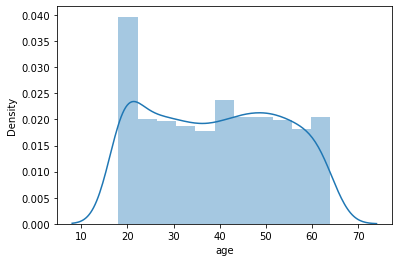

In [7]:
sns.distplot(df['age'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

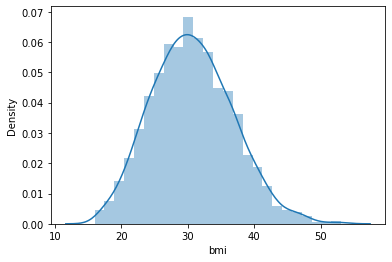

In [8]:
sns.distplot(df['bmi'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

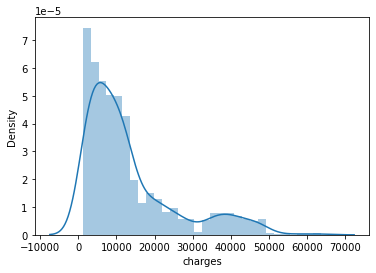

In [9]:
sns.distplot(df['charges'])

### 3.6 Measure of skewness
#### 1. We see that charges is more highly skewed, next comes bmi with less skewnes and finally comes the age with very less skewness. This was also noticed in visuvalization

In [10]:
df[['bmi','age','charges']].skew(axis=0)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

### Identify outliers
#### Outliers are simply the points that are Q3 being 1.5 times more than  IQR  and Q1 being 1.5 times less than  IQR. 

In [11]:
IQR_age = df.describe()['age'][6] - df.describe()['age'][4]
IQR_charges = df.describe()['charges'][6] - df.describe()['charges'][4]
IQR_bmi = df.describe()['bmi'][6] - df.describe()['bmi'][4]
outlier_below_Q1_age = df.describe()['age'][4] - 1.5*IQR_age
outlier_above_Q3_age = df.describe()['age'][6] + 1.5*IQR_age
outlier_below_Q1_charges = df.describe()['charges'][4] - 1.5*IQR_charges
outlier_above_Q3_charges = df.describe()['charges'][6] + 1.5*IQR_charges
outlier_below_Q1_bmi = df.describe()['bmi'][4] - 1.5*IQR_charges
outlier_above_Q3_bmi = df.describe()['bmi'][6] + 1.5*IQR_charges

In [12]:
outlier_age = []
outlier_charges = []
outlier_bmi = []

def outlier_check_age(x):
    if x > outlier_above_Q3_age or x < outlier_below_Q1_age:
        outlier_age.append(x)
        
def outlier_check_charges(x):
    if x > outlier_above_Q3_charges or x < outlier_below_Q1_charges:
        outlier_charges.append(x)
        
def outlier_check_bmi(x):
    if x > outlier_above_Q3_bmi or x < outlier_below_Q1_bmi:
        outlier_bmi.append(x)

df['age'].apply(outlier_check_age)
if not outlier_age:
    print("No outliers in age")
elif outlier_age:
    print("Outliers present in age")

df['charges'].apply(outlier_check_charges)
if not outlier_charges:
    print("No outliers in charges")
elif outlier_charges:
    print("Outliers present in charges")

df['bmi'].apply(outlier_check_bmi)
if not outlier_bmi:
    print("No outliers in bmi")
elif outlier_charges:
    print("Outliers present in bmi")

No outliers in age
Outliers present in charges
No outliers in bmi


### Distribution of categorical columns
#### here sex, smoker,region and children are categorical

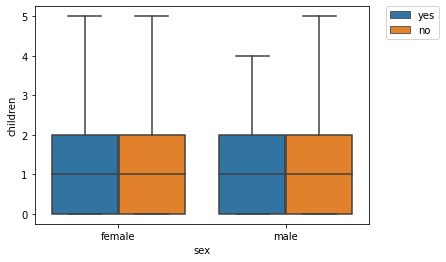

In [13]:
sns.boxplot(x ='sex',y = 'children',data=df, hue='smoker')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='children', ylabel='charges'>

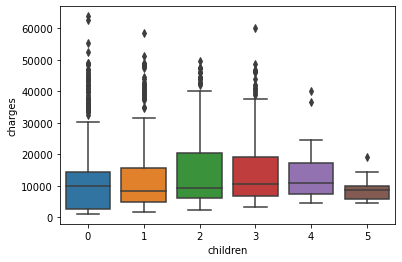

In [14]:
sns.boxplot(x='children', y='charges', data= df)

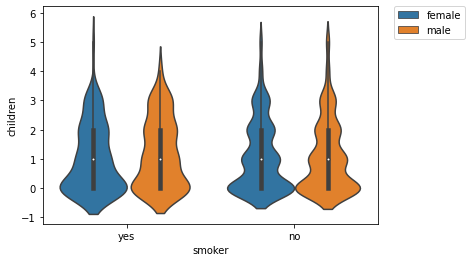

In [15]:
sns.violinplot(x ='smoker',y = 'children',data=df, hue='sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

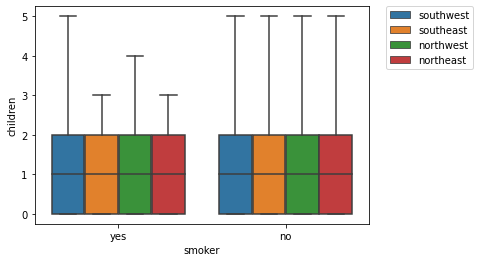

In [16]:
sns.boxplot(x ='smoker',y = 'children',data=df, hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='sex', ylabel='charges'>

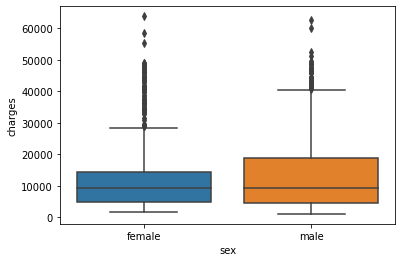

In [17]:
sns.boxplot(x='sex', y='charges', data= df)

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

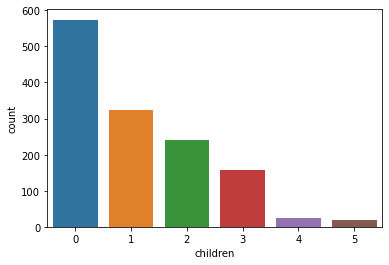

In [18]:
sns.countplot(df['children'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

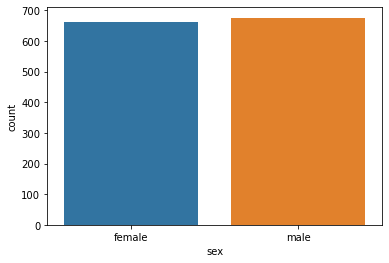

In [19]:
sns.countplot(df['sex'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

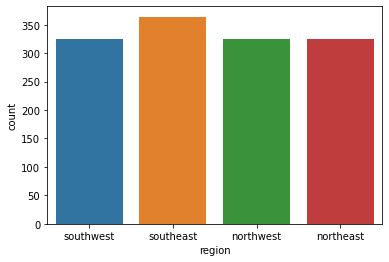

In [20]:
sns.countplot(df['region'])

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

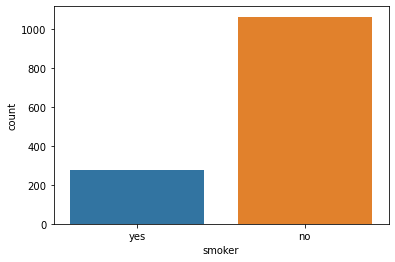

In [21]:
sns.countplot(df['smoker'])

### Pairplot of complete Dataframe

<Figure size 720x576 with 0 Axes>

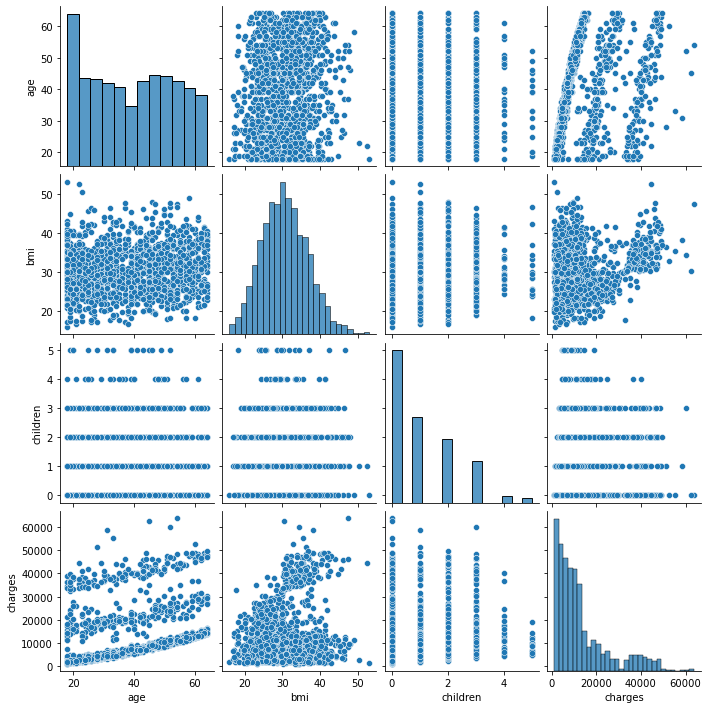

In [22]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
# Here we might not get the object dtype's data as they are non numerical, we might have to categorise them 
# with numbers using dummies

### 4. Statistical evidence
#### 4a. Charges of people who smoke and who don't, their comparison
##### - Yes, the charges of people who smoke differ from people who don't. In order to find this using numerical data:
##### - Use groupby feature and take mean of charges
##### - Use groupy and apply describe method, this will show the min and max charges of both as well along with std
##### - Use visuvalization to view the difference - i have used violin plot and box plot

In [23]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [24]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


<AxesSubplot:xlabel='smoker', ylabel='charges'>

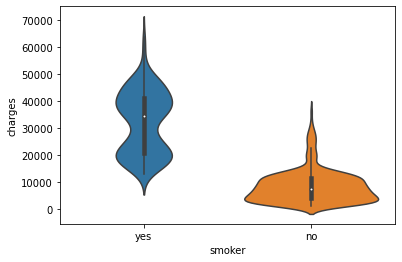

In [25]:
sns.violinplot(x = 'smoker', y = 'charges', data=df)
# Here the width of no is more in the bottom which shows majority of charges for non smokers are way below and extends only till 
# <40k where width is too low which means there are very few data points whereas for smokers its more at 20k and 40k and extends 
# all the way to 70k. The width of smoker is almost even from start till end.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

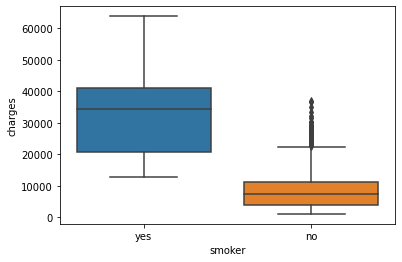

In [26]:
sns.boxplot(x = 'smoker', y = 'charges', data=df)
# This clearly shows the 5 poing summary of both smoker and non. We can see that non smoker's data points are very low and 
# has more ouliers when they are more, in smokers they are much more higher with no outliers. 

In [41]:
Nullhyp = 'charge does not differ for smoker and non-smoker'
Althyp = 'charge differs for smoker and non-smoker'
x = df[df['smoker'] == 'yes']['charges']
y = df[df['smoker'] == 'no']['charges']
t, p_value  = stats.ttest_ind(x,y, axis = 0)
print(p_value)
# We reject null hypothesis as p value is more than 0.5

8.271435842177219e-283


### 4b.Does bmi of males differ significantly from that of females?
#### No, they dont differ much except if we want to check decimal points. By seeing mean, it is very clear that male and female are almost the same but  while checking through decimal places male tend to have more bmi than females by 0.57 
#### We have also added box plots which are very clearly stating the same.
#### Important point to note is that male has max value which is an outlier and a std deviation little more than females.

### Finally we can conclude that there isnt much difference of bmi with male and female, they are almost same

In [28]:
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [29]:
df.groupby('sex')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


In [30]:
sns.scatterplot(x='age', y)

SyntaxError: positional argument follows keyword argument (<ipython-input-30-ae9213715f64>, line 1)

In [ ]:
sns.boxplot(x='sex', y='bmi', data=df)

In [161]:
Nullhyp = "Gender does not play a role in bmi"
Althyp = "gender plays a role in bmi"
x = df[df['sex'] == 'male']['bmi'] 
y = df[df['sex'] == 'female']['bmi']
t, p_value  = stats.ttest_ind(x,y, axis = 0)  
print(p_value)
# We accept null hypothesis as value is more than 0.5 and also above data shows that they are same for both

0.08997637178984932


### 4c. Is the proportion of smokers significantly different in different genders?
#### Males are higher than females in smoking category by 44

In [90]:
df[df['smoker'] == 'yes'].groupby('sex')['smoker'].count()

sex
female    115
male      159
Name: smoker, dtype: int64

In [99]:
df.groupby(['smoker','sex'])['sex'].count()

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: sex, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

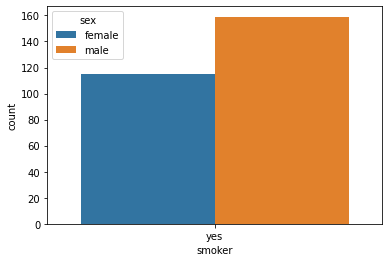

In [81]:
sns.countplot(x='smoker',data=df[df['smoker']=='yes'],hue='sex')

In [155]:
Nullhyp = "Smokers dont vary in genders"
Althyp = "Smokers vary in genders"
crosstab = pd.crosstab(df['sex'],df['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


In [157]:
# We will reject the null hypothesis as p value is less than 0.5 so smokers vary in gender

### 4d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [106]:
df[df['sex']=='female'].groupby('children')['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
3    30.436429
4    31.943182
5    30.620625
Name: bmi, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='bmi'>

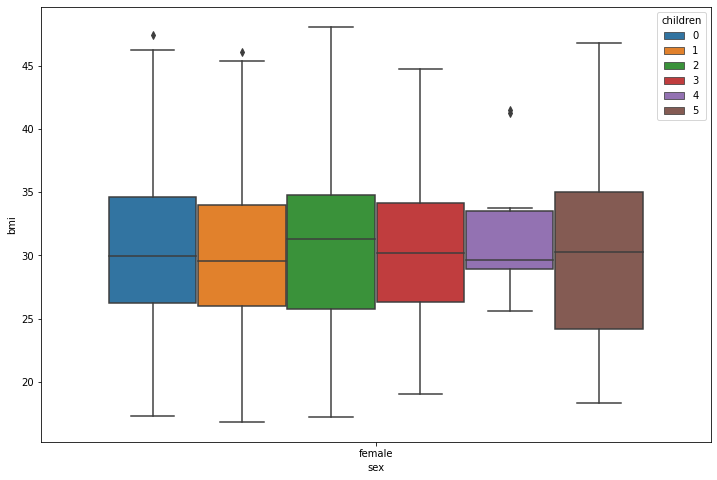

In [110]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'sex', y ='bmi', data=df[df['sex']=='female'], hue='children')

In [149]:
Nullhyp = "There is no connect between bmi and number of childrens"
Althyp = "There is a connect between bmi and no of childrens"
df_females = df[df['sex']=='female']
zero = df_females[df_females.children == 0]['bmi']
one = df_females[df_females.children == 1]['bmi']
two = df_females[df_females.children == 2]['bmi']
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


In [151]:
# Which means we accept null hypothesis and there is no connect 